In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#Let's check what's in the dataset
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
cancer['frame']

In [8]:
#Lets print the feature names
cancer.feature_names.shape

(30,)

In [9]:
cancer.data.shape

(569, 30)

In [10]:
# for a classification task, in this case a binary classification
# always check if all the classes are well represented in the data
a ,b = zip(cancer.target_names, np.bincount(cancer.target))

In [11]:
a

('malignant', 212)

In [12]:
b

('benign', 357)

In [13]:
# let's save the cancer data features into a pandas dataframe
feature_df = pd.DataFrame(cancer.data,columns=[cancer.feature_names])

In [14]:
feature_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### let's apply k nearest neighbors on this dataset

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# train test split 75, 25
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)




In [19]:
## let's make lists to store difference model accuracy to store the performance
# with different value of k for KNN

In [20]:
training_accuracy = []
test_accuracy = []

In [21]:
# make an array of neighbors 
neighbors_settings = range(1,11)

In [22]:
neighbors_settings

range(1, 11)

In [23]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

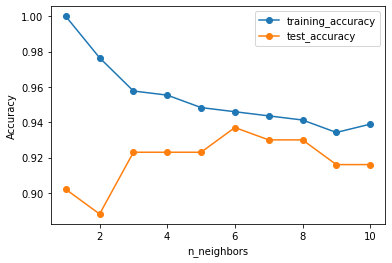

In [24]:
plt.plot(neighbors_settings,training_accuracy,label='training_accuracy',marker='o')
plt.plot(neighbors_settings,test_accuracy,label='test_accuracy',marker='o')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


In [25]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression()

In [30]:
logreg.fit(X_train,y_train)

/Users/amansangal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
logreg = LogisticRegression().fit(X_train,y_train)

/Users/amansangal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
logreg.score(X_test,y_test)

0.965034965034965

In [33]:
logreg.score(X_train,y_train)

0.9460093896713615

In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)

/Users/amansangal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#printing the scores
logreg100.score(X_train,y_train)

0.9483568075117371

In [36]:
logreg100.score(X_test,y_test)

0.958041958041958

## Decision Trees 

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
cancer = load_breast_cancer()

In [39]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)


In [40]:
tree = DecisionTreeClassifier(random_state=0)

In [41]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
print('Decision tree training accuracy is ',tree.score(X_train,y_train))

Decision tree training accuracy is  1.0


In [43]:
print('test accuracy is ',tree.score(X_test,y_test))

test accuracy is  0.9370629370629371


### ok the training accuracy of 100% and test accuracy of 94% indicates overfitting
### may be our tree has gone deep enough in order to obtain pure leaf
### How do we prevent overfitting in the Decision trees
### there comes the pre-prunning or just prunning 
  limit the depth of tree <br>
  limit the number of leaves <br>
  or constrain the splitting of nodes only if it contains a minimum no. of training points

In [44]:
#let's try with depth equals to 4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [47]:
print(f"accuracy on train is {tree.score(X_train,y_train):0.2f}")

accuracy on train is 0.99


In [48]:
print(f"accuracy on test is {tree.score(X_test,y_test):0.2f}")

accuracy on test is 0.95


## let's visualize the tree

In [49]:
from sklearn.tree import export_graphviz

In [50]:
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)


In [51]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'